# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 🧠 Objetivos del Desafío
* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar dos o más modelos de clasificación.
* Evaluar el rendimiento de los modelos con métricas.
* Interpretar los resultados, incluyendo la importancia de las variables.
* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## 📚 Entregables

- Notebook con análisis completo
- Modelo final entrenado
- Informe de hallazgos

## 1. Preparación de Datos

### 1.1 Carga y exploración inicial de datos

In [702]:
#importar el archivo de datos
import pandas as pd
#cargar el archivo de datos
data = pd.read_csv('https://raw.githubusercontent.com/anasayago/challenge2-data-science-latam/refs/heads/main/datos_tratados_2.csv',sep=',')
data.shape

(7043, 24)

In [703]:
#primeras filas del archivo de datos
data.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,0-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,0-10,2
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-10,1
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-20,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-10,2


In [704]:
# Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID Cliente                         7043 non-null   object 
 1   Abandono                           7043 non-null   int64  
 2   Género                             7043 non-null   object 
 3   Mayor de 65 años                   7043 non-null   bool   
 4   Tiene Pareja                       7043 non-null   int64  
 5   Tiene Dependientes                 7043 non-null   int64  
 6   Duración del Contrato (meses)      7043 non-null   int64  
 7   Servicio Telefónico                7043 non-null   int64  
 8   Múltiples Líneas                   7043 non-null   int64  
 9   Servicio de Internet               7043 non-null   object 
 10  Seguridad en Línea                 7043 non-null   int64  
 11  Respaldo en Línea                  7043 non-null   int64

In [705]:
#variables númericas
data.describe()

,Abandono,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Facturación Sin Papel,Costo Mensual,Costo Total,Costo Diario,Cantidad de Servicios Contratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.483033,0.299588,32.371149,0.903166,0.325004,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.592219,64.761692,2279.734304,2.158675,2.459747
std,0.441561,0.499748,0.458110,24.559481,0.295752,0.642730,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.491457,30.090047,2266.794470,1.003088,2.045539
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000,1.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000,2.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,4.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,7.000000


In [706]:
print("\nDistribución de Abandono:")
print(data['Abandono'].value_counts(normalize=True))


Distribución de Abandono:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


 ⚠️ Comportamiento de la clase principal (Churn)
* No abandono:  73.463 %
* Abandono:  26.537 %

In [707]:
#variables categóricas
data.describe(include='object')

,ID Cliente,Género,Servicio de Internet,Tipo de Contrato,Método de Pago,Rango de Contrato
count,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,4,8
top,0002-ORFBO,M,Fibra Óptica,Mensual,Cheque electrónico,0-10
freq,1,3555,3096,3875,2365,1854


### 1.2 Limpieza y Preparación de Datos

In [708]:
# Eliminar columnas que no aportan información relevante
data = data.drop(columns=['ID Cliente','Costo Diario','Duración del Contrato (meses)'])

Las siguientes columnas no aportan información relevante
* Se elimina 'ID Cliente' por ser identificador único que no aporta información predictiva
* Se elimina 'Costo Diario' ya que deriva de 'Costo Mensual', lo que puede introducir multicolinealidad
* Se elimina 'Duración del Contrato (meses)' ya que existe Rango de Contrato y puede ser usado 

In [709]:
#información general del conjunto de datos después de eliminar columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Abandono                           7043 non-null   int64  
 1   Género                             7043 non-null   object 
 2   Mayor de 65 años                   7043 non-null   bool   
 3   Tiene Pareja                       7043 non-null   int64  
 4   Tiene Dependientes                 7043 non-null   int64  
 5   Servicio Telefónico                7043 non-null   int64  
 6   Múltiples Líneas                   7043 non-null   int64  
 7   Servicio de Internet               7043 non-null   object 
 8   Seguridad en Línea                 7043 non-null   int64  
 9   Respaldo en Línea                  7043 non-null   int64  
 10  Protección del Dispositivo         7043 non-null   int64  
 11  Soporte Técnico                    7043 non-null   int64

### 1.3 Analisis de Gráficos para variables númericas relevantes

De acuerdo a la estadistica descriptiva las variables con variabilidad significativa y potencial predictivo son: 
- Costo Mensual
- Costo Total
- Cantidad de Servicios

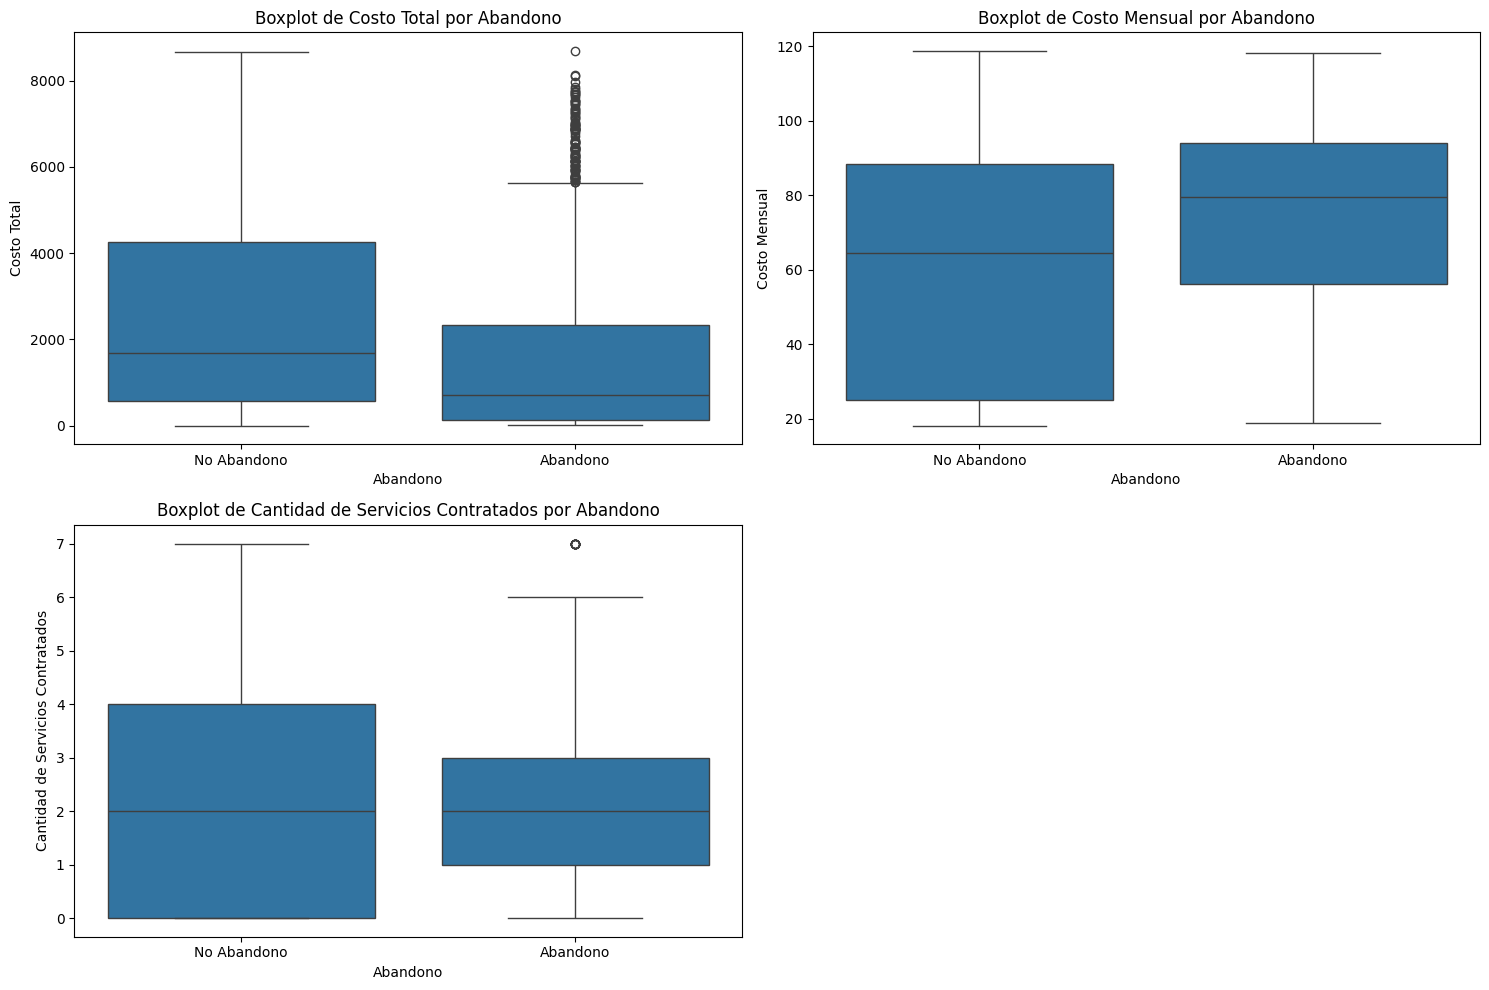

In [710]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

columnas_numericas = [
    'Costo Total',
    'Costo Mensual',
    'Cantidad de Servicios Contratados'
]

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Abandono', y=columna, data=data)
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


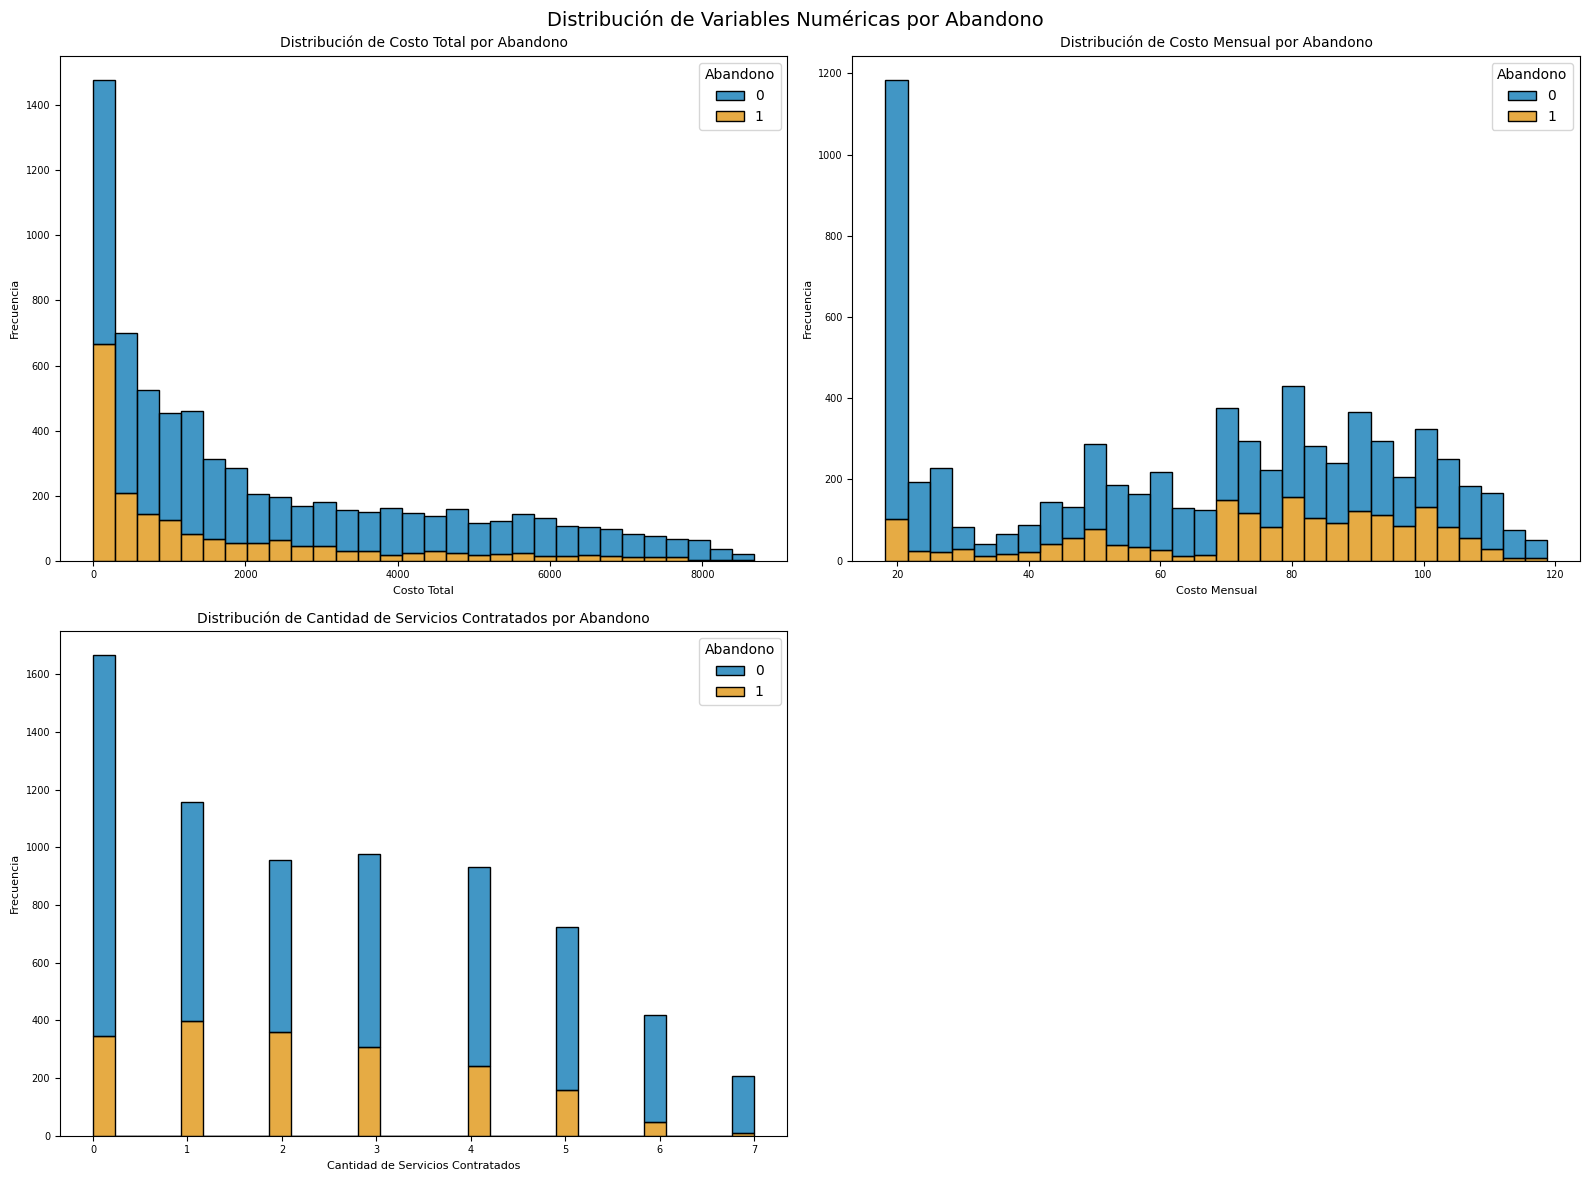


Estadísticas para Costo Total:
           count         mean          std    min    25%       50%      75%  \
Abandono                                                                      
0         5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1         1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

              max  
Abandono           
0         8672.45  
1         8684.80  

Estadísticas para Costo Mensual:
           count       mean        std    min    25%     50%   75%     max
Abandono                                                                  
0         5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1         1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

Estadísticas para Cantidad de Servicios Contratados:
           count      mean       std  min  25%  50%  75%  max
Abandono                                                     
0         5174.0  2.545226  2.149223  0.0  0.0  2.0  4.0  7

In [711]:
# distribución de las variables numéricas por Abandono(Crunch)
plt.figure(figsize=(16,12))

palette_colorblind = sns.color_palette("colorblind")[:2]

# Histogramas por estado de Abandono
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)

    sns.histplot(
        data=data,
        x=columna,
        hue='Abandono',
        multiple="stack",  
        palette=palette_colorblind,  
        bins=30  # Número de bins
    )

    plt.title(f'Distribución de {columna} por Abandono', fontsize=10)
    plt.xlabel(columna, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.suptitle('Distribución de Variables Numéricas por Abandono', fontsize=14)
plt.tight_layout()
plt.show()

# Análisis estadístico complementario
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(data.groupby('Abandono')[columna].describe())


⚠️ Las variables muestran las siguientes simetrías
* Costo Total
    - Fuerte asimetría positiva
    - Muchos valores bajos
    - Pocos valores extremadamente altos
* Costo Mensual
    - Moderadamente asimétrico
    - Sesgo positivo
    - Media ligeramente superior a mediana
* Cantidad de Servicios Contratados
    - Distribución cercana a normal
    - Rango discreto y limitado

In [712]:
# Comportamiento de las variables binarias relevantes
variables_binarias = ['Tiene Pareja','Tiene Dependientes',
                      'Múltiples Líneas', 'Seguridad en Línea',
                      'Respaldo en Línea', 'Protección del Dispositivo']
for columna in variables_binarias:
    print(columna, data[columna].value_counts(normalize=True)*100)

Tiene Pareja Tiene Pareja
0    51.69672
1    48.30328
Name: proportion, dtype: float64
Tiene Dependientes Tiene Dependientes
0    70.041176
1    29.958824
Name: proportion, dtype: float64
Múltiples Líneas Múltiples Líneas
 0    48.132898
 1    42.183729
-1     9.683374
Name: proportion, dtype: float64
Seguridad en Línea Seguridad en Línea
 0    49.666335
 1    28.666761
-1    21.666903
Name: proportion, dtype: float64
Respaldo en Línea Respaldo en Línea
 0    43.844952
 1    34.488144
-1    21.666903
Name: proportion, dtype: float64
Protección del Dispositivo Protección del Dispositivo
 0    43.944342
 1    34.388755
-1    21.666903
Name: proportion, dtype: float64


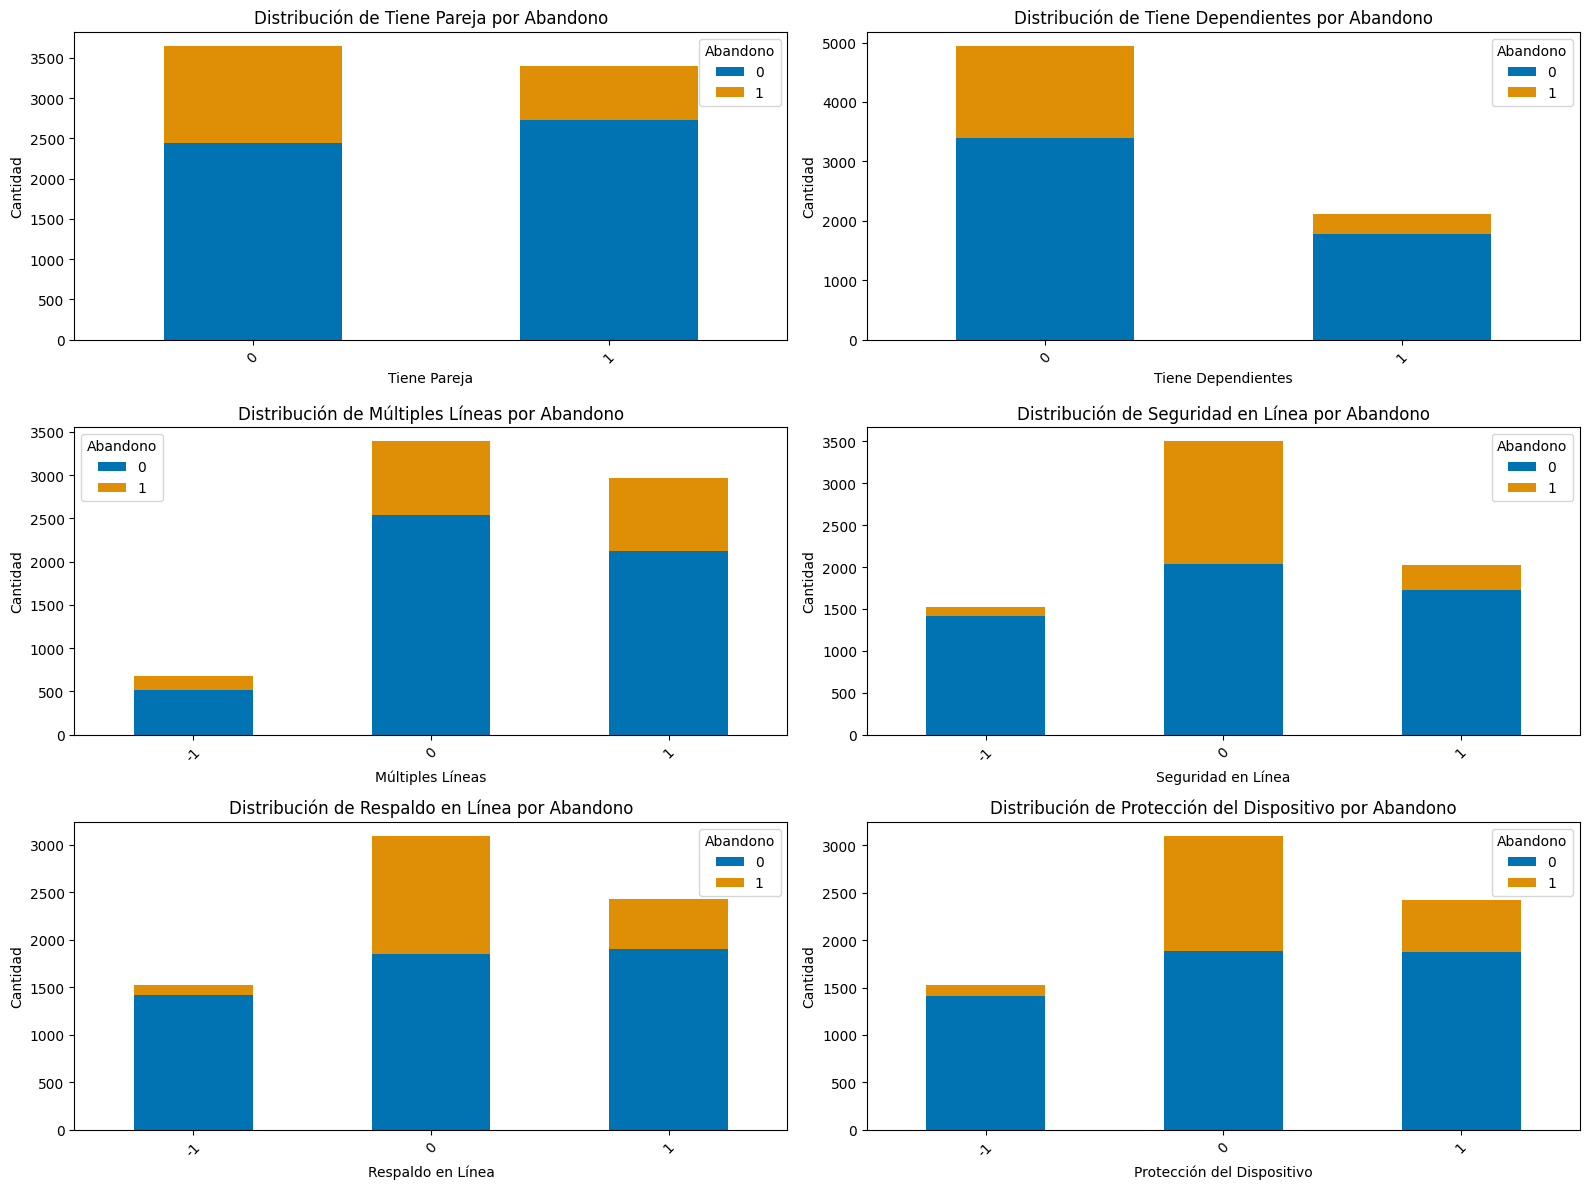

In [713]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("colorblind")

plt.figure(figsize=(16,12))
for i, variable in enumerate(variables_binarias, 1):
    plt.subplot(3, 2, i)
    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot.plot(kind='bar', stacked=True, 
                   color=sns.color_palette("colorblind"), 
                   ax=plt.gca())
    
    plt.title(f'Distribución de {variable} por Abandono')
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [714]:
# Chi-cuadrado para medir dependencia
from scipy.stats import chi2_contingency

for columna in variables_binarias:
    contingencia = pd.crosstab(data[columna], data['Abandono'])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{columna}: p-valor = {p_valor}")

Tiene Pareja: p-valor = 2.139911344075994e-36
Tiene Dependientes: p-valor = 4.924921661215422e-43
Múltiples Líneas: p-valor = 0.0034643829548773003
Seguridad en Línea: p-valor = 2.6611496351767036e-185
Respaldo en Línea: p-valor = 2.079759216086427e-131
Protección del Dispositivo: p-valor = 5.505219496457244e-122


De las variables binarias podemos decir: 
- Todas las variables tienen una relación estadísticamente significativa con el abandono
- Seguridad en Línea y Respaldo en Línea tienen la relación más fuerte
- Hay evidencia de que estas características influyen en la probabilidad de abandono

In [715]:
# Analisis de variables binarias de servicios adicionales
servicios_internet = [
    'Seguridad en Línea', 
    'Respaldo en Línea', 
    'Protección del Dispositivo', 
    'Soporte Técnico', 
    'TV por Cable', 
    'Streaming de Películas'
]

# Chi-cuadrado para Múltiples Líneas
print("Dependencias con Múltiples Líneas:")
for servicio in servicios_internet:
    contingencia = pd.crosstab(data['Múltiples Líneas'], data[servicio])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{servicio}: p-valor = {p_valor}")

# Chi-cuadrado para Servicios de Internet
print("\nDependencias entre Servicios de Internet:")
for i in range(len(servicios_internet)):
    for j in range(i+1, len(servicios_internet)):
        servicio1 = servicios_internet[i]
        servicio2 = servicios_internet[j]
        contingencia = pd.crosstab(data[servicio1], data[servicio2])
        chi2, p_valor, _, _ = chi2_contingency(contingencia)
        print(f"{servicio1} vs {servicio2}: p-valor = {p_valor}")


Dependencias con Múltiples Líneas:
Seguridad en Línea: p-valor = 2.06274332335275e-159
Respaldo en Línea: p-valor = 6.073056430297738e-182
Protección del Dispositivo: p-valor = 1.0325188802064614e-183
Soporte Técnico: p-valor = 3.449656924095101e-160
TV por Cable: p-valor = 1.1345217439737563e-207
Streaming de Películas: p-valor = 1.4157232232017275e-208

Dependencias entre Servicios de Internet:
Seguridad en Línea vs Respaldo en Línea: p-valor = 0.0
Seguridad en Línea vs Protección del Dispositivo: p-valor = 0.0
Seguridad en Línea vs Soporte Técnico: p-valor = 0.0
Seguridad en Línea vs TV por Cable: p-valor = 0.0
Seguridad en Línea vs Streaming de Películas: p-valor = 0.0
Respaldo en Línea vs Protección del Dispositivo: p-valor = 0.0
Respaldo en Línea vs Soporte Técnico: p-valor = 0.0
Respaldo en Línea vs TV por Cable: p-valor = 0.0
Respaldo en Línea vs Streaming de Películas: p-valor = 0.0
Protección del Dispositivo vs Soporte Técnico: p-valor = 0.0
Protección del Dispositivo vs TV p

Mapa de calor de correlación entre Servicios de Internet:
                            Seguridad en Línea  Respaldo en Línea  \
Seguridad en Línea                    1.000000           0.705166   
Respaldo en Línea                     0.705166           1.000000   
Protección del Dispositivo            0.701690           0.711335   
Soporte Técnico                       0.735191           0.709216   
TV por Cable                          0.662220           0.703167   
Streaming de Películas                0.667033           0.700158   

                            Protección del Dispositivo  Soporte Técnico  \
Seguridad en Línea                            0.701690         0.735191   
Respaldo en Línea                             0.711335         0.709216   
Protección del Dispositivo                    1.000000         0.725327   
Soporte Técnico                               0.725327         1.000000   
TV por Cable                                  0.748182         0.703866   
Streamin

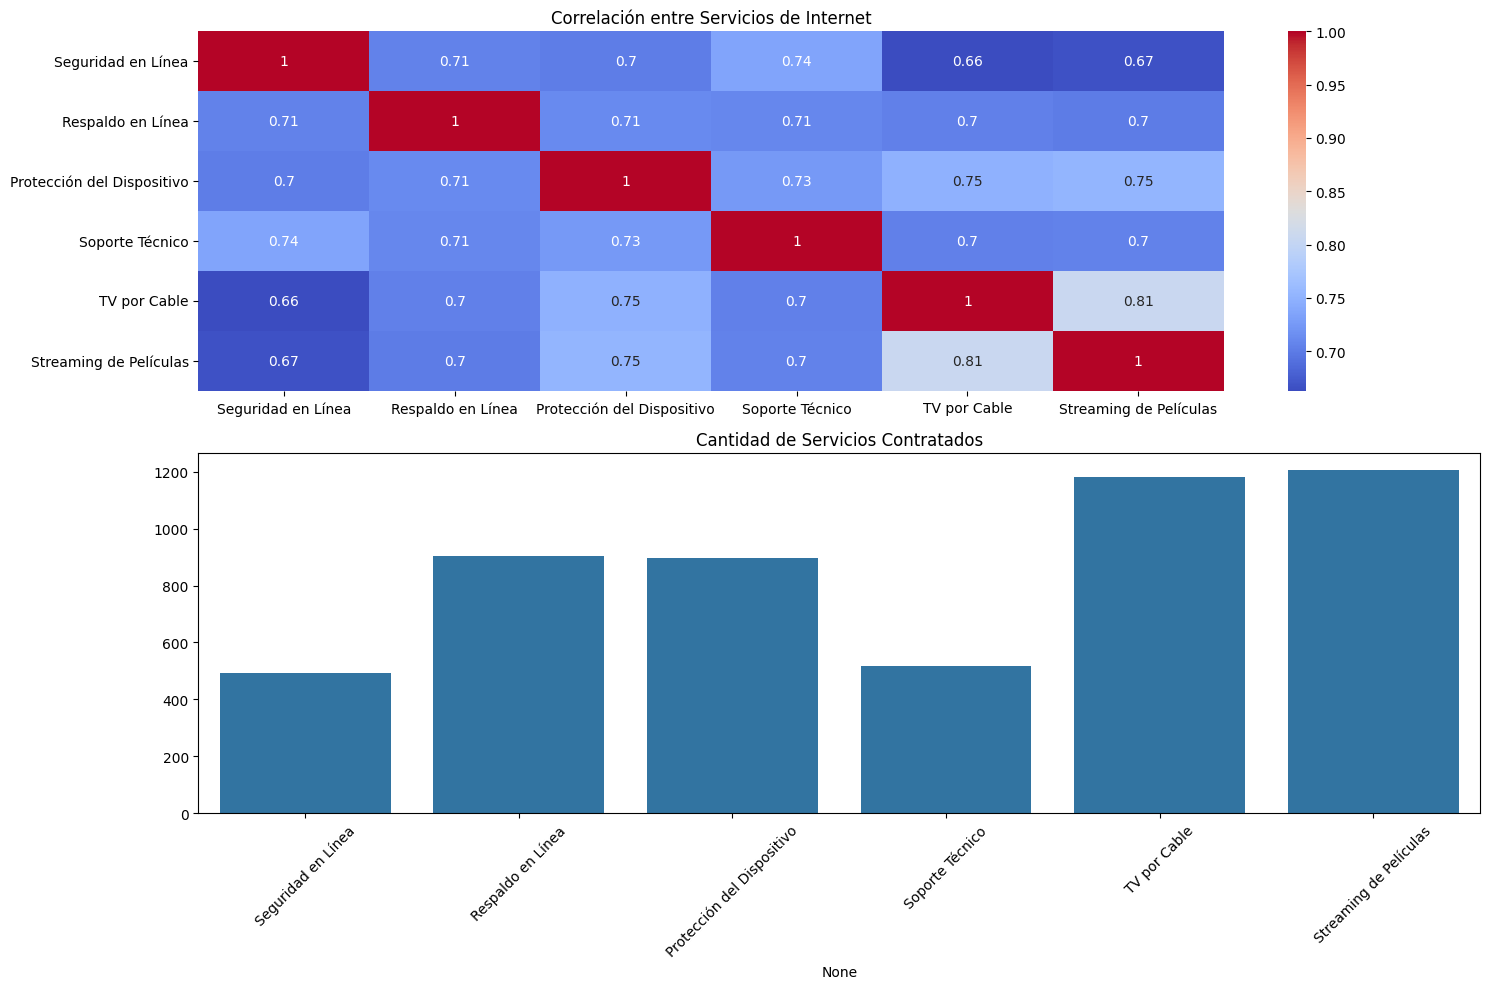

In [716]:
plt.figure(figsize=(15,10))
corr = data[servicios_internet].corr()
print("Mapa de calor de correlación entre Servicios de Internet:")
print(corr)

# Heatmap de correlación
plt.subplot(2,1,1)
sns.heatmap(
    data[servicios_internet].corr(), 
    annot=True, 
    cmap='coolwarm'
)
plt.title('Correlación entre Servicios de Internet')

# Distribución de servicios
plt.subplot(2,1,2)
servicios_count = data[servicios_internet].sum()
sns.barplot(x=servicios_count.index, y=servicios_count.values)
plt.title('Cantidad de Servicios Contratados')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [717]:
def analisis_abandono_servicios(servicios):
    resultados = {}
    for servicio in servicios:
        abandono_con_servicio = data[data[servicio] == 1]['Abandono'].mean()
        abandono_sin_servicio = data[data[servicio] == 0]['Abandono'].mean()
        
        resultados[servicio] = {
            'Abandono con servicio': abandono_con_servicio,
            'Abandono sin servicio': abandono_sin_servicio,
            'Diferencia': abandono_con_servicio - abandono_sin_servicio
        }
    
    return pd.DataFrame.from_dict(resultados, orient='index')

# Análisis de abandono
print("Análisis de Abandono por Servicios:")
print(analisis_abandono_servicios(servicios_internet))


Análisis de Abandono por Servicios:
                            Abandono con servicio  Abandono sin servicio  \
Seguridad en Línea                       0.146112               0.417667   
Respaldo en Línea                        0.215315               0.399288   
Protección del Dispositivo               0.225021               0.391276   
Soporte Técnico                          0.151663               0.416355   
TV por Cable                             0.300702               0.335231   
Streaming de Películas                   0.299414               0.336804   

                            Diferencia  
Seguridad en Línea           -0.271555  
Respaldo en Línea            -0.183973  
Protección del Dispositivo   -0.166256  
Soporte Técnico              -0.264691  
TV por Cable                 -0.034529  
Streaming de Películas       -0.037390  


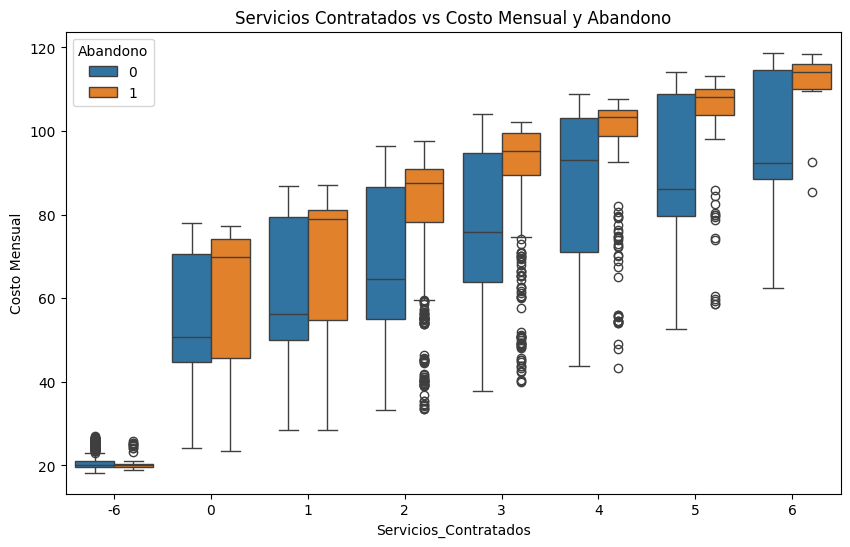

In [718]:
# Número de servicios contratados
data['Servicios_Contratados'] = data[servicios_internet].sum(axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(x='Servicios_Contratados', y='Costo Mensual', hue='Abandono', data=data)
plt.title('Servicios Contratados vs Costo Mensual y Abandono')
plt.show()


Analisis de Servicios adicionales de Servicio Telefónico e Internet
- Todos los servicios reducen la probabilidad de abandono
- Priorizar Seguridad en Línea y Soporte Técnico
- Servicios con alta correlación pueden ser empaquetados

### 1.4 Gráficos de variables categóricas

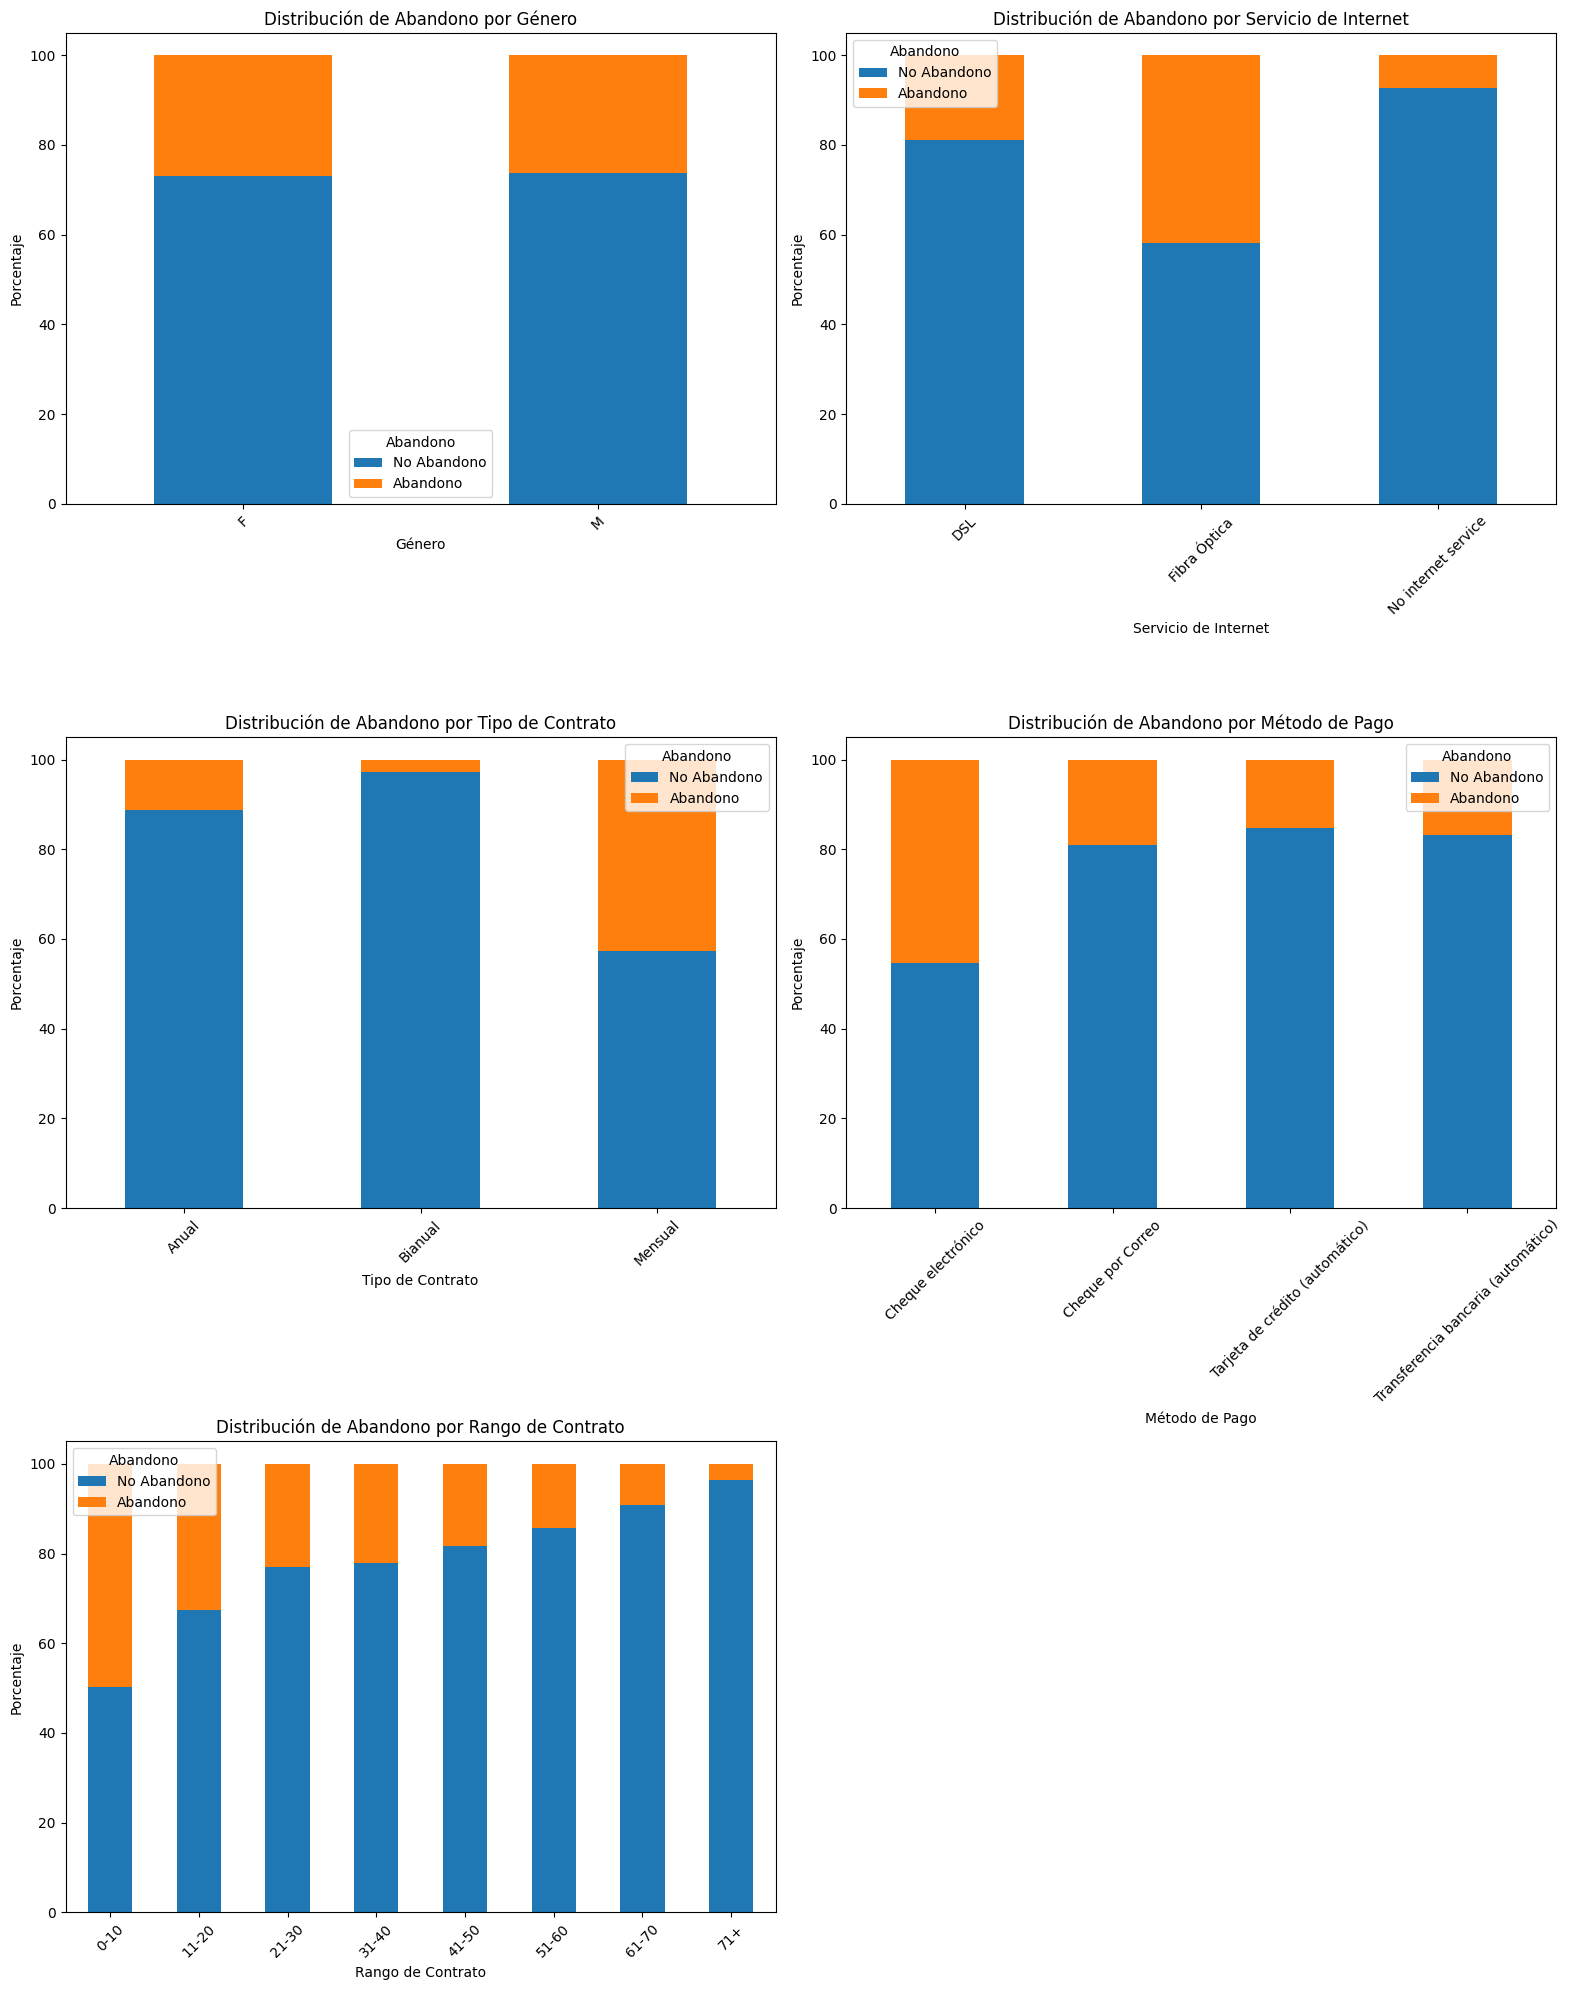

In [719]:
# Variables categóricas
categoricas = ['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago', 'Rango de Contrato']
plt.figure(figsize=(16,20))

for i, variable in enumerate(categoricas, 1):
    plt.subplot(3, 2, i)

    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot_percent = data_plot.div(data_plot.sum(axis=1), axis=0) * 100

    data_plot_percent.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de Abandono por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje')
    plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [720]:
# Chi-cuadrado para evaluar dependencia
from scipy.stats import chi2_contingency

for variable in categoricas:
    contingencia = pd.crosstab(data[variable], data['Abandono'])
    chi2, p_value, dof, expected = chi2_contingency(contingencia)

    print(f"\nVariable: {variable}")
    print(f"Chi-cuadrado: {chi2}")
    print(f"P-value: {p_value}")
    print("Significativa:" + " Sí" if p_value < 0.05 else " No")



Variable: Género
Chi-cuadrado: 0.4840828822091383
P-value: 0.48657873605618596
 No

Variable: Servicio de Internet
Chi-cuadrado: 732.309589667794
P-value: 9.571788222840544e-160
Significativa: Sí

Variable: Tipo de Contrato
Chi-cuadrado: 1184.5965720837926
P-value: 5.863038300673393e-258
Significativa: Sí

Variable: Método de Pago
Chi-cuadrado: 648.1423274814
P-value: 3.6823546520098007e-140
Significativa: Sí

Variable: Rango de Contrato
Chi-cuadrado: 924.4718998283975
P-value: 2.4912128980736296e-195
Significativa: Sí


### 1.5 Información Mutua con Variable Abandono

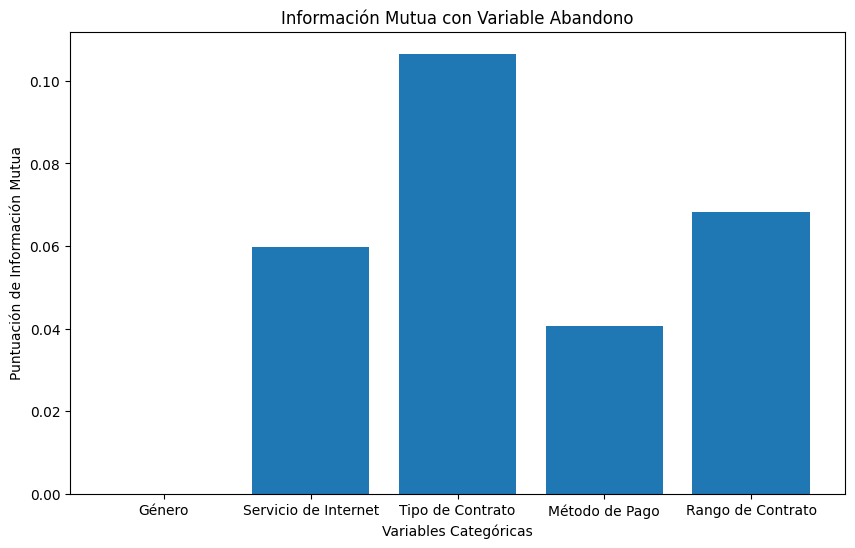

Género: 0.0
Servicio de Internet: 0.059691927943368306
Tipo de Contrato: 0.10658760172937964
Método de Pago: 0.04071476212830949
Rango de Contrato: 0.0682035249415962


In [721]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = data[categoricas].apply(le.fit_transform)

# Calcular información mutua
mi_scores = mutual_info_classif(X_encoded, data['Abandono'])

# Visualizar
plt.figure(figsize=(10,6))
plt.bar(categoricas, mi_scores)
plt.title('Información Mutua con Variable Abandono')
plt.xlabel('Variables Categóricas')
plt.ylabel('Puntuación de Información Mutua')
plt.show()

# Imprimir scores
for var, score in zip(categoricas, mi_scores):
    print(f"{var}: {score}")


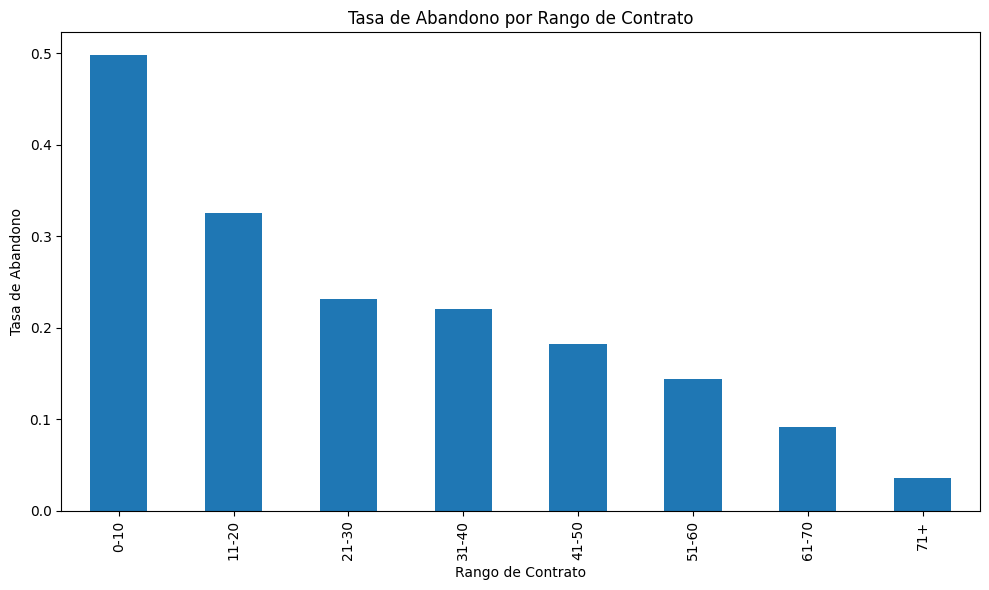

In [722]:
# Análisis de la tasa de abandono por rango de contrato

plt.figure(figsize=(10,6))
churn_by_contract = data.groupby('Rango de Contrato')['Abandono'].mean()
churn_by_contract.plot(kind='bar')
plt.title('Tasa de Abandono por Rango de Contrato')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Rango de Contrato')
plt.tight_layout()
plt.show()

### 1.6 Detección y tratamiento de outliers


In [723]:
def agrupar_por_churn(rango):
    if rango in ['0-10', '11-20']:
        return 'Riesgo Alto'
    elif rango in ['21-30', '31-40']:
        return 'Riesgo Medio'
    else:
        return 'Riesgo Bajo'

data['Rango_Contrato'] = data['Rango de Contrato'].apply(agrupar_por_churn)
#Eliminar columna original
data = data.drop(columns=['Rango de Contrato'])

⚠️ Se aplicaran transformaciones logarítmica, boxcx y raiz cuadrada

In [724]:
import numpy as np
from scipy import stats
# Transformaciones
data['log_costo_total'] = np.log1p(data['Costo Total'])
data['sqr_costo_total']= np.sqrt(data['Costo Total'])
#data['log_costo_total'] = stats.boxcox(data['Costo Total'] + 1)
data['boxcx_costo_mensual'], _ = stats.boxcox(data['Costo Mensual'] + 1)
data['sqr_costo_mensual'] = np.sqrt(data['Costo Mensual'])
#data['sqr_duracion_contrato'] = np.sqrt(data['Duración del Contrato (meses)'])
data['sqr_servicios'] = np.sqrt(data['Cantidad de Servicios Contratados'])
data.head()

,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Servicio Telefónico,Múltiples Líneas,Servicio de Internet,Seguridad en Línea,Respaldo en Línea,...,Costo Mensual,Costo Total,Cantidad de Servicios Contratados,Servicios_Contratados,Rango_Contrato,log_costo_total,sqr_costo_total,boxcx_costo_mensual,sqr_costo_mensual,sqr_servicios
0,0,F,False,1,1,1,0,DSL,0,1,...,65.6,593.30,3,3,Riesgo Alto,6.387384,24.357750,51.741233,8.099383,1.732051
1,0,M,False,0,0,1,1,DSL,0,0,...,59.9,542.40,2,1,Riesgo Alto,6.297846,23.289483,47.538605,7.739509,1.414214
2,1,M,False,0,0,1,0,Fibra Óptica,0,0,...,73.9,280.85,1,1,Riesgo Alto,5.641375,16.758580,57.814375,8.596511,1.000000
3,1,M,True,1,0,1,0,Fibra Óptica,0,1,...,98.0,1237.85,4,4,Riesgo Alto,7.121939,35.183093,75.187363,9.899495,2.000000
4,1,F,True,1,0,1,0,Fibra Óptica,0,0,...,83.9,267.40,2,2,Riesgo Alto,5.592478,16.352370,65.066470,9.159694,1.414214


<Figure size 1500x1000 with 0 Axes>

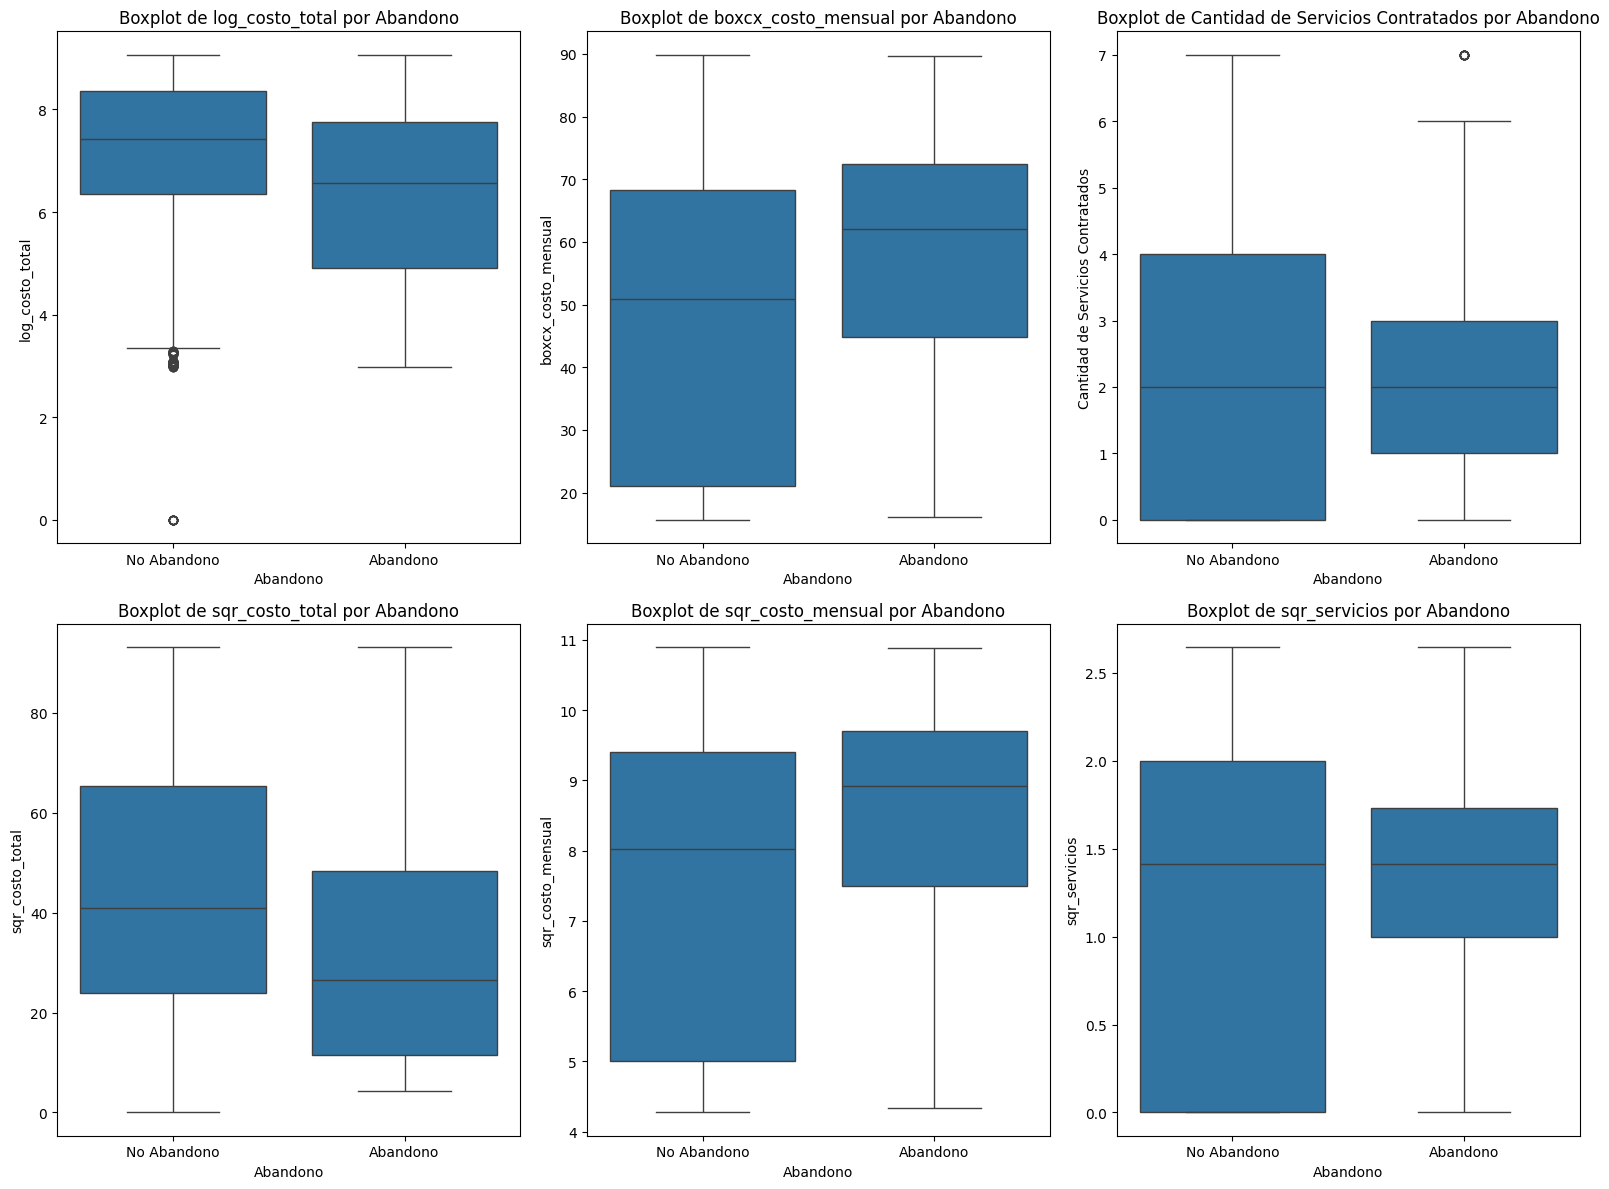

In [725]:
plt.figure(figsize=(15,10))

# Columnas numéricas
columnas_numericas = [
    'log_costo_total',
    'boxcx_costo_mensual',
    'Cantidad de Servicios Contratados',
    'sqr_costo_total',
    'sqr_costo_mensual',
    'sqr_servicios'
]

# Visualización de boxplots por estado de Abandono de las columnas numéricas
plt.figure(figsize=(16,12))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Abandono', y=columna, data=data)
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


In [726]:
#eliminar variables transformadas porque no logran una mejora significativa en la distribución
data = data.drop(columns=['log_costo_total', 'boxcx_costo_mensual'])

In [727]:
#eliminar las variables transformadas, posteriormene se analizará si se vuelven a incluir
data = data.drop(columns=['Costo Total','Costo Mensual','Cantidad de Servicios Contratados'])

In [728]:
data.columns

Index(['Abandono', 'Género', 'Mayor de 65 años', 'Tiene Pareja',
       'Tiene Dependientes', 'Servicio Telefónico', 'Múltiples Líneas',
       'Servicio de Internet', 'Seguridad en Línea', 'Respaldo en Línea',
       'Protección del Dispositivo', 'Soporte Técnico', 'TV por Cable',
       'Streaming de Películas', 'Tipo de Contrato', 'Facturación Sin Papel',
       'Método de Pago', 'Servicios_Contratados', 'Rango_Contrato',
       'sqr_costo_total', 'sqr_costo_mensual', 'sqr_servicios'],
      dtype='object')

### 1.7 Codificación de variables categóricas

In [729]:
# One-Hot Encoding con get_dummies
categoricas = ['Género', 'Tipo de Contrato', 'Método de Pago','Rango_Contrato', 'Servicio de Internet']

# Aplicación básica
data_encoded = pd.get_dummies(data, columns=categoricas)

# Opciones adicionales
data_encoded = pd.get_dummies(
    data,
    columns=categoricas,
    prefix=categoricas,  # Prefijo para nuevas columnas
    drop_first=True     # Elimina primera categoría para evitar multicolinealidad
)
print("\nColumnas después de One-Hot Encoding:")
print(data_encoded.shape)
print(data_encoded.columns)


Columnas después de One-Hot Encoding:
(7043, 27)
Index(['Abandono', 'Mayor de 65 años', 'Tiene Pareja', 'Tiene Dependientes',
       'Servicio Telefónico', 'Múltiples Líneas', 'Seguridad en Línea',
       'Respaldo en Línea', 'Protección del Dispositivo', 'Soporte Técnico',
       'TV por Cable', 'Streaming de Películas', 'Facturación Sin Papel',
       'Servicios_Contratados', 'sqr_costo_total', 'sqr_costo_mensual',
       'sqr_servicios', 'Género_M', 'Tipo de Contrato_Bianual',
       'Tipo de Contrato_Mensual', 'Método de Pago_Cheque por Correo',
       'Método de Pago_Tarjeta de crédito (automático)',
       'Método de Pago_Transferencia bancaria (automático)',
       'Rango_Contrato_Riesgo Bajo', 'Rango_Contrato_Riesgo Medio',
       'Servicio de Internet_Fibra Óptica',
       'Servicio de Internet_No internet service'],
      dtype='object')



Variables de Interes en Matriz de Correlación:
Abandono                                              1.000000
Tipo de Contrato_Mensual                              0.405103
Servicio de Internet_Fibra Óptica                     0.308020
sqr_costo_mensual                                     0.203373
Facturación Sin Papel                                 0.191825
TV por Cable                                          0.164673
Streaming de Películas                                0.163220
Mayor de 65 años                                      0.150889
Servicios_Contratados                                 0.104231
Protección del Dispositivo                            0.084654
Respaldo en Línea                                     0.074205
Múltiples Líneas                                      0.036310
Soporte Técnico                                       0.027037
Seguridad en Línea                                    0.023309
Servicio Telefónico                                   0.011942
Género_

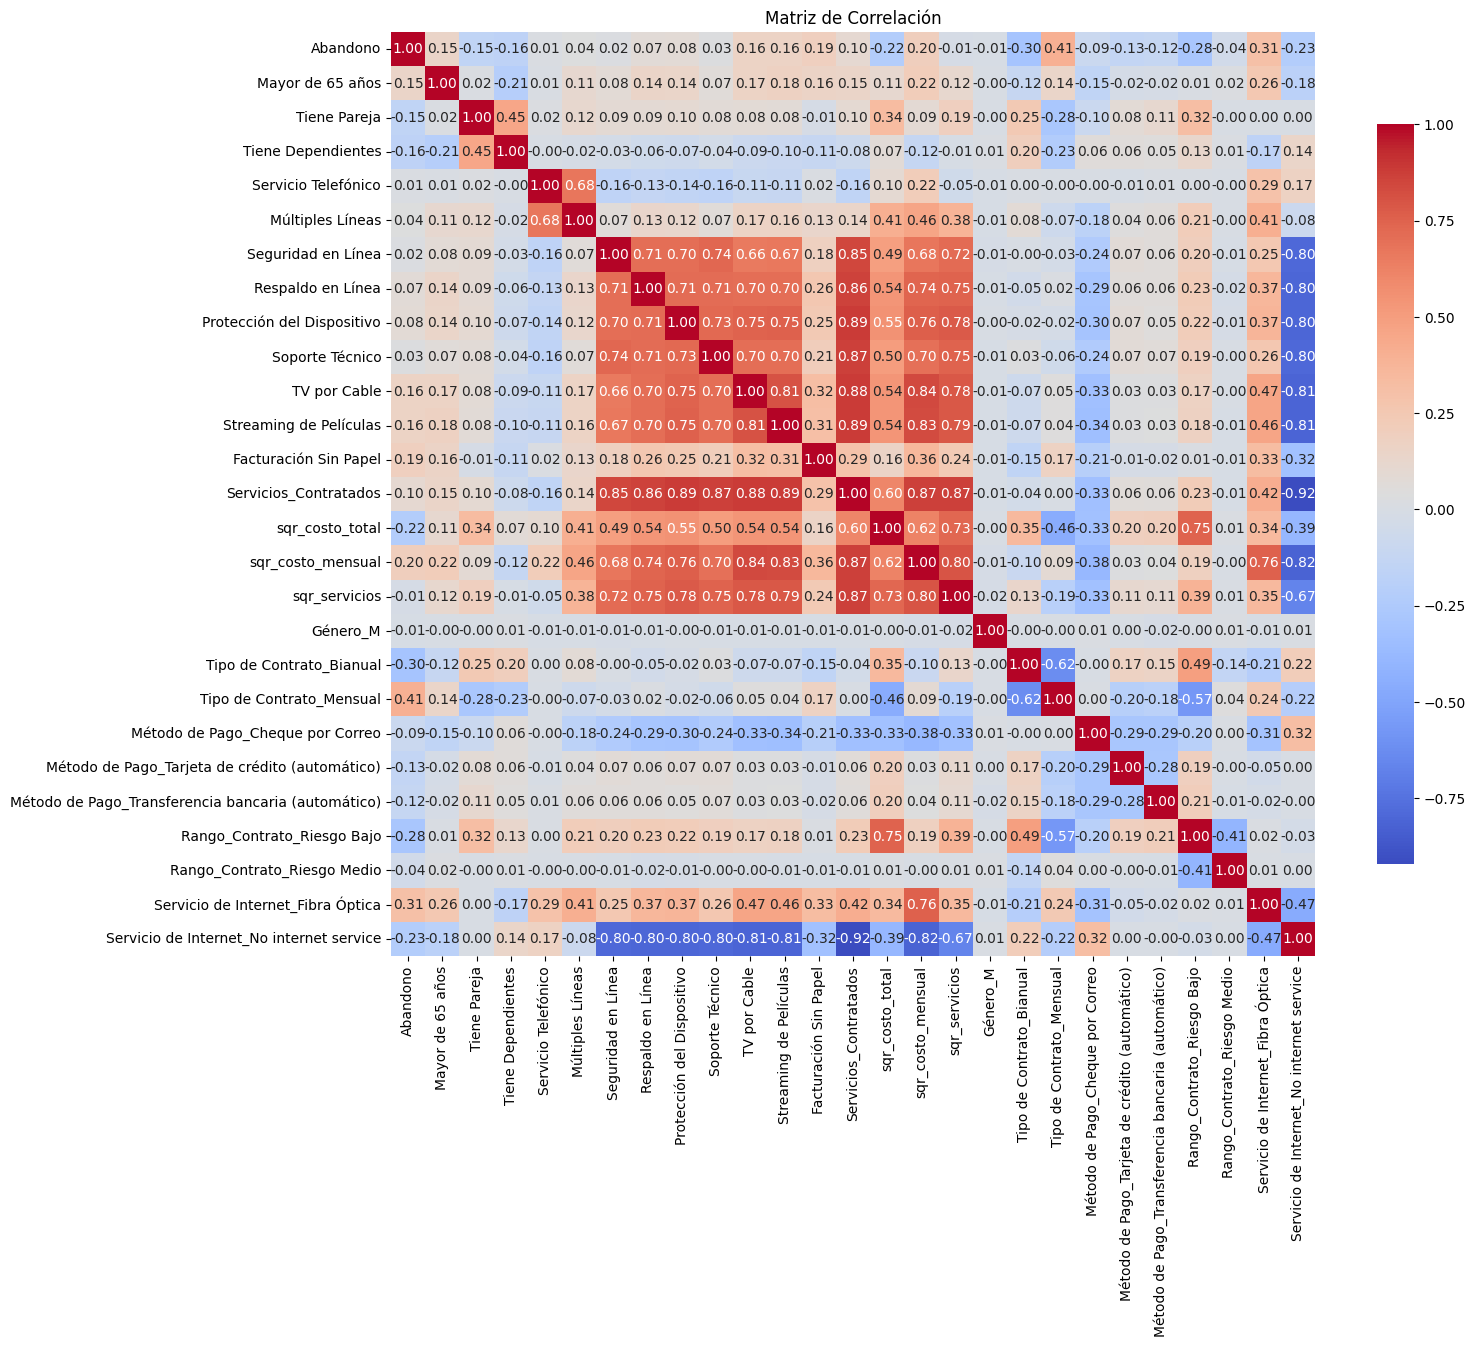

In [730]:
# analisis de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
correlation_matrix = data_encoded.corr()

# Extraer variables de interés
print("\nVariables de Interes en Matriz de Correlación:")
print(correlation_matrix['Abandono'].sort_values(ascending=False))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

* Correlaciones Positivas (Aumentan probabilidad de Abandono):
    - Tipo de Contrato_Mensual (0.405)
    - Servicio de Internet_Fibra Óptica (0.308)
    - sqr_costo_mensual (0.203)
    - Facturación Sin Papel (0.192)
    - TV por Cable (0.165)
    - Streaming de Películas (0.163)
    - Mayor de 65 años (0.151)

* Correlaciones Negativas (Disminuyen probabilidad de Abandono):
    - Rango_Contrato_Riesgo Bajo (-0.284)
    - Tipo de Contrato_Bianual (-0.302)
    - Servicio de Internet_No internet service (-0.228)
    - sqr_costo_total (-0.223)
    - Tiene Dependientes (-0.164)
    - Tiene Pareja (-0.150)
    - Método de Pago_Tarjeta de crédito (automático) (-0.134)

## 2. Preparación para Modelado

### 2.1 Separación de Datos

In [731]:
# Variable dependiente
y = data_encoded['Abandono']
# Variables independientes
X = data_encoded.drop(columns=['Abandono'])

In [732]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 2.2 Balanceo de clases

In [733]:
# Contar distribución de clases
distribucion = data_encoded['Abandono'].value_counts(normalize=True)
print(distribucion)

# Calcular ratio de desbalanceo
ratio = len(data_encoded[data_encoded['Abandono']==0]) / len(data[data['Abandono']==1])
print(f"Ratio de desbalanceo: {ratio}")

Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Ratio de desbalanceo: 2.7683253076511503


**No se aplicará balanceo** ya que tiene una **ratio de desbalanceo moderado** de 2.77 (no extremo), por lo tanto no es un desbalanceo crítico (generalmente se considera crítico >5)

## 3. Entrenamiento de Modelos

### 3.1 Selección de los Modelos
- Random Forest: ✅ Adecuado 
    - Robusto con distintos tipos de variables
    - Buena interpretabilidad
    - Captura no linealidades
≈
- CatBoost: ✅ Muy bueno
    - Excelente con variables categóricas
    - Maneja binarias perfectamente
    - Reduce sesgo de codificación

- Random Forest: ✅ Adecuado 
    - Robusto con distintos tipos de variables
    - Buena interpretabilidad
    - Captura no linealidades

### 3.2 Random Forest

In [734]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, 
                                  random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test)

### 3.3 Catboost

In [735]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [736]:
from catboost import CatBoostClassifier

# Configuración del modelo CatBoost
model_cb = CatBoostClassifier(
    iterations=300,  # Aumentar iteraciones
    learning_rate= 0.1,  # Probar diferentes tasas
    depth=6,  # Variar profundidad
    l2_leaf_reg=3,  # Regularización
    random_seed=42,
    verbose=0  # Quita mensajes de progreso
)

# Entrenar el modelo CatBoost
model_cb.fit(X_train, y_train)
# Hacer predicciones
y_pred_cb = model_cb.predict(X_test)


### 3.4 Xgboost

In [737]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [738]:
import xgboost as xgb

# Entrenar el modelo XGBoost
model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
# Hacer predicciones
y_pred_xgb = model_xgb.predict(X_test)

## 4. Evaluación de los modelos

### 4.1 Métricas de Random Forest

In [739]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest
print("Métricas Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Métricas Random Forest:
Accuracy: 0.7821149751596878
Precision: 0.6175438596491228
Recall: 0.47058823529411764
F1-score: 0.5341426403641881
Matriz de confusión:
 [[926 109]
 [198 176]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### 4.2 Métricas de CatBoost

In [740]:
# CatBoost
print("\nMétricas de CatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("Precision:", precision_score(y_test, y_pred_cb))
print("Recall:", recall_score(y_test, y_pred_cb))
print("F1-score:", f1_score(y_test, y_pred_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))


Métricas de CatBoost:
Accuracy: 0.7856635911994322
Precision: 0.6168831168831169
Recall: 0.5080213903743316
F1-score: 0.5571847507331378
Matriz de confusión:
 [[917 118]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 4.3 Métricas de XGBoost

In [741]:
# XGBoost
print("\nMetricas de XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Metricas de XGBoost:
Accuracy: 0.7771469127040455
Precision: 0.5943396226415094
Recall: 0.5053475935828877
F1-score: 0.546242774566474
Matriz de confusión:
 [[906 129]
 [185 189]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



## 5 Ajuste de modelos
#### 5.1 Random Forest

In [742]:
# Aumentar la complejidad del modelo
model_ajustado_rf = RandomForestClassifier(
    n_estimators=150,        # Más árboles
    max_depth=10,            # Mayor profundidad máxima
    min_samples_split=5,     # Menos muestras para dividir un nodo
    min_samples_leaf=3,      # Menos muestras en una hoja
    max_features='sqrt',     # Número de características a considerar en cada división
    random_state=42
)

model_ajustado_rf.fit(X_train, y_train)
y_pred_ajustado_rf= model_ajustado_rf.predict(X_test)

#### 5.2 CatBoost

In [743]:
# Aumentar la complejidad y ajustar parámetros de CatBoost
from catboost import CatBoostClassifier
model_ajustado_cb = CatBoostClassifier(
    iterations=500,          # Más iteraciones
    learning_rate=0.01,     # Tasa de aprendizaje más baja
    depth=8,                # Mayor profundidad
    l2_leaf_reg=3,          # Regularización L2
    random_seed=42,
    verbose=0               # Quitar mensajes de progreso
)
model_ajustado_cb.fit(X_train, y_train)
y_pred_ajustado_cb = model_ajustado_cb.predict(X_test)

#### 5.3 XGBoost

In [744]:
# Aumentar la complejidad y ajustar parámetros de XGBoost
model_ajustado_xgb = xgb.XGBClassifier(
    n_estimators=150,         # Más árboles
    max_depth=10,             # Mayor profundidad máxima
    learning_rate=0.05,       # Tasa de aprendizaje más baja
    subsample=0.8,            # Porcentaje de muestras para cada árbol
    colsample_bytree=0.8,     # Porcentaje de columnas para cada árbol
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,          # Regularización L1
    reg_lambda=1.0          # Regularización L2
)

model_ajustado_xgb.fit(X_train, y_train)
y_pred_ajustado_xgb = model_ajustado_xgb.predict(X_test)

### 5.4 Evaluación de modelos ajustados


In [745]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_rf))
print("Precision:", precision_score(y_test, y_pred_ajustado_rf))
print("Recall:", recall_score(y_test, y_pred_ajustado_rf))
print("F1-score:", f1_score(y_test, y_pred_ajustado_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_rf))
print(classification_report(y_test, y_pred_ajustado_rf))

Random Forest:
Accuracy: 0.794180269694819
Precision: 0.6458333333333334
Recall: 0.49732620320855614
F1-score: 0.5619335347432024
Matriz de confusión:
 [[933 102]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [746]:
# CatBoost
print("\nCatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_cb))
print("Precision:", precision_score(y_test, y_pred_ajustado_cb))
print("Recall:", recall_score(y_test, y_pred_ajustado_cb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_cb))
print(classification_report(y_test, y_pred_ajustado_cb))


CatBoost:
Accuracy: 0.7934705464868701
Precision: 0.6445993031358885
Recall: 0.4946524064171123
F1-score: 0.5597579425113465
Matriz de confusión:
 [[933 102]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [747]:
# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_xgb))
print("Precision:", precision_score(y_test, y_pred_ajustado_xgb))
print("Recall:", recall_score(y_test, y_pred_ajustado_xgb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_xgb))
print(classification_report(y_test, y_pred_ajustado_xgb))


XGBoost:
Accuracy: 0.7785663591199432
Precision: 0.6019736842105263
Recall: 0.4893048128342246
F1-score: 0.5398230088495575
Matriz de confusión:
 [[914 121]
 [191 183]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### 5.5 Entrenamiento y evaluación en datos de entrenamiento

In [748]:
# Entrenamiento y evaluación en datos de entrenamiento
y_train_pred_ajustado_rf = model_ajustado_rf.predict(X_train)
y_train_pred_ajustado_cb = model_ajustado_cb.predict(X_train)
y_train_pred_xgb_ajustado = model_ajustado_xgb.predict(X_train)

print("Random Forest - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_rf))
print("Random Forest - Prueba:", accuracy_score(y_test, y_pred_ajustado_rf))

print("CatBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_cb))
print("CatBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_cb))

print("XGBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_xgb_ajustado))
print("XGBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_xgb))

Random Forest - Entrenamiento: 0.8500177493787717
Random Forest - Prueba: 0.794180269694819
CatBoost - Entrenamiento: 0.8446929357472488
CatBoost - Prueba: 0.7934705464868701
XGBoost - Entrenamiento: 0.9449769258075967
XGBoost - Prueba: 0.7785663591199432


Análisis de Overfitting:

- Random Forest
    - Entrenamiento: 85.00%
    - Prueba: 79.42%
    - Diferencia: 5.58% (Moderado overfitting)

- CatBoost
    - Entrenamiento: 84.47%
    - Prueba: 79.35%
    - Diferencia: 5.12% (Moderado overfitting)

- XGBoost
    - Entrenamiento: 94.50%
    - Prueba: 77.86%
    - Diferencia: 16.64% (Alto overfitting)

**Interpretación**
- XGBoost: Mayor sobreajuste
- Random Forest: Mejor generalización
- CatBoost: Equilibrio intermedio

### 5.6 Validación cruzada

In [749]:
# Validación cruzada para evaluar la estabilidad del modelo
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(model_ajustado_rf, X, y, cv=5, scoring='accuracy')
print("Random Forest - Validación cruzada (accuracy):", rf_scores.mean())

cb_scores = cross_val_score(model_ajustado_cb, X, y, cv=5, scoring='accuracy')
print("CatBoost - Validación cruzada (accuracy):", cb_scores.mean())

xgb_scores = cross_val_score(model_ajustado_xgb, X, y, cv=5, scoring='accuracy')
print("XGBoost - Validación cruzada (accuracy):", xgb_scores.mean())

Random Forest - Validación cruzada (accuracy): 0.7976740434866765
CatBoost - Validación cruzada (accuracy): 0.801509169946448
XGBoost - Validación cruzada (accuracy): 0.7891550462933092


### 5.7 Dataframe de variables reducidas

Se considera reducir el dataset para disminuye la complejidad del modelo, reducir el ruido y sobretodo manejar el sobreajuste

In [750]:
#importancia de las características
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model_rf.feature_importances_)
}).sort_values('importance', ascending=False)
print(importance.head())

                       feature  importance
13             sqr_costo_total    0.225780
14           sqr_costo_mensual    0.182967
18    Tipo de Contrato_Mensual    0.072562
22  Rango_Contrato_Riesgo Bajo    0.037781
12       Servicios_Contratados    0.037066


In [751]:
features = X.columns
importances = model_rf.feature_importances_
#crear DataFrame X_reduced
low_importance = [feature for feature, importance in zip(features, importances) if importance < 0.01]
print("Variables a eliminar:", low_importance)
X_reduced = X.drop(columns=low_importance)

Variables a eliminar: ['Servicio Telefónico', 'Servicio de Internet_No internet service']


#### 5.7.1 Random Forest con variables reducidas

In [752]:
#Modelo Random Forest con las variables reducidas
rdmforest_model_reducido = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

rdmforest_model_reducido.fit(X_reduced, y)
y_pred_rf_reducido = rdmforest_model_reducido.predict(X_test.drop(columns=low_importance))

#### 5.7.2 CatBoost con variables reducidas

In [753]:
#Modelo CatBoost con las variables reducidas
model_ajustado_cb_reducido = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=8,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0
)

model_ajustado_cb_reducido.fit(X_reduced, y)
y_pred_cb_reducido = model_ajustado_cb_reducido.predict(X_test.drop(columns=low_importance))

#### 5.7.3 XGBoost con variables reducidas

In [754]:
#Modelo XGBoost con las variables reducidas
model_ajustado_xgb_reducido = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=1.0
)
model_ajustado_xgb_reducido.fit(X_reduced, y)
y_pred_xgb_reducido = model_ajustado_xgb_reducido.predict(X_test.drop(columns=low_importance))

#### 5.7.4 Evaluación de Modelos con variables reducidas

In [755]:
#Comparar resultados de los modelos con variables reducidas
print("Random Forest con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_reducido))
print("Precision:", precision_score(y_test, y_pred_rf_reducido))
print("Recall:", recall_score(y_test, y_pred_rf_reducido))
print("F1-score:", f1_score(y_test, y_pred_rf_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf_reducido))
print(classification_report(y_test, y_pred_rf_reducido))

Random Forest con variables reducidas:
Accuracy: 0.8317955997161107
Precision: 0.7370242214532872
Recall: 0.56951871657754
F1-score: 0.6425339366515838
Matriz de confusión:
 [[959  76]
 [161 213]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1035
           1       0.74      0.57      0.64       374

    accuracy                           0.83      1409
   macro avg       0.80      0.75      0.77      1409
weighted avg       0.82      0.83      0.82      1409



In [756]:
#Comparar resultados de los modelos con variables reducidas
print("CatBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb_reducido))
print("Precision:", precision_score(y_test, y_pred_cb_reducido))
print("Recall:", recall_score(y_test, y_pred_cb_reducido))
print("F1-score:", f1_score(y_test, y_pred_cb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb_reducido))
print(classification_report(y_test, y_pred_cb_reducido))


CatBoost con variables reducidas:
Accuracy: 0.8211497515968772
Precision: 0.7132867132867133
Recall: 0.5454545454545454
F1-score: 0.6181818181818182
Matriz de confusión:
 [[953  82]
 [170 204]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1035
           1       0.71      0.55      0.62       374

    accuracy                           0.82      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [757]:
#Comparar resultados de los modelos con variables reducidas
print("XGBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_reducido))
print("Precision:", precision_score(y_test, y_pred_xgb_reducido))
print("Recall:", recall_score(y_test, y_pred_xgb_reducido))
print("F1-score:", f1_score(y_test, y_pred_xgb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb_reducido))
print(classification_report(y_test, y_pred_xgb_reducido))

XGBoost con variables reducidas:
Accuracy: 0.9382540809084458
Precision: 0.9042253521126761
Recall: 0.8582887700534759
F1-score: 0.8806584362139918
Matriz de confusión:
 [[1001   34]
 [  53  321]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1035
           1       0.90      0.86      0.88       374

    accuracy                           0.94      1409
   macro avg       0.93      0.91      0.92      1409
weighted avg       0.94      0.94      0.94      1409



Observamos las siguientes mejoras: 
- Random Forest
    - Antes: Accuracy 0.7942
    - Después: Accuracy 0.8318
    - Mejora: +0.0376 (+4.74%)
- CatBoost
    - Después: Accuracy 0.8212
    - Antes: Accuracy 0.7935
    - Mejora: +0.0277 (+3.49%)
- XGBoost
    - Antes: Accuracy 0.7786
    - Después: Accuracy 0.9383
    - Mejora: +0.1597 (+20.52%)

**XGBoost** muestra la mejora significativa y se observa que la reducción de variables REDUJO el sobreajuste. Tambien observamos que todos los modelos mejoraron su rendimiento.

Se refuerza la idea que **XGBoost** con **variables reducidas** es el mejor modelo.

#### 5.7.5 Validación Cruzada con variables reducidas

In [758]:
# Validación cruzada para evaluar la estabilidad del modelo con variables reducidas
rf_reduced_scores = cross_val_score(rdmforest_model_reducido, X_reduced, y, cv=5, scoring='accuracy')
print("Random Forest Reducido - Validación cruzada (accuracy):", rf_reduced_scores.mean())
print("CatBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_cb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())
print("XGBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_xgb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())

Random Forest Reducido - Validación cruzada (accuracy): 0.7979583360216788
CatBoost Reducido - Validación cruzada (accuracy): 0.8020764444480288
XGBoost Reducido - Validación cruzada (accuracy): 0.7894381290728434


Justificación para mantener XGBoost:
A pesar de tener una pequeña variación con los otros modelos en la validación cruzada, podemo decir que el rendimiento es mejor: 
- Accuracy en prueba: 0.9383
- Precision: 0.9042
- Recall: 0.8583
- F1-score: 0.8807
Esta diferencia es estadísticamente aceptable y no compromete la generalización del modelo

**XGBoost** tambien técnicamente tiene un manejo eficiente de variables, capacidad de aprendizaje incremental y tratamiento robusto de datos no lineales.

### 5.8 Ajuste de Umbral

Realizar análisis de curva ROC para encontrar umbral óptimo que maximice rendimiento del modelo.

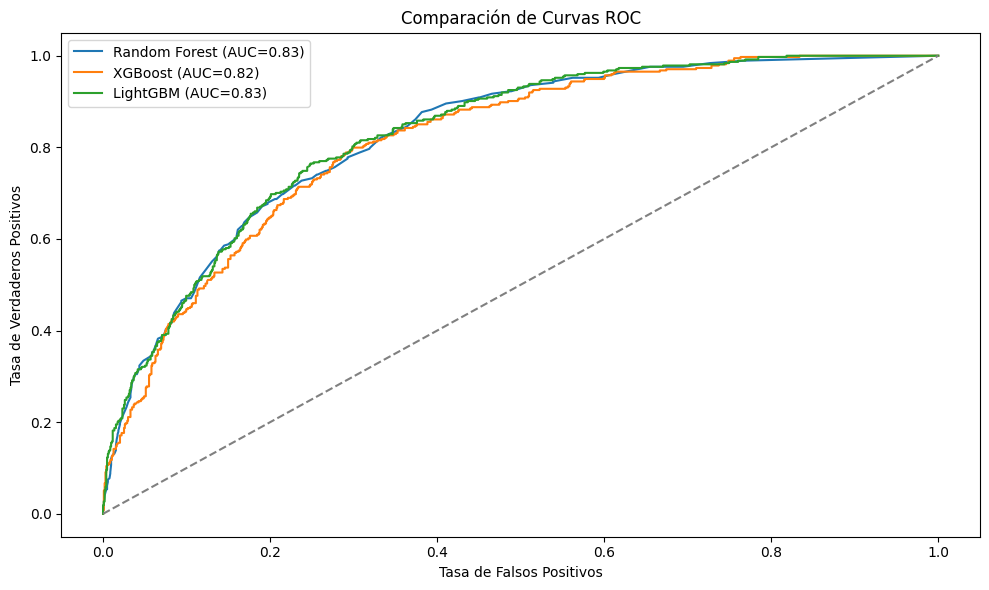

AUC Random Forest: 0.83
AUC XGBoost: 0.82
AUC LightGBM: 0.83


In [759]:
# Probabilidades de cada modelo sin cambios
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_cb = model_cb.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest: {auc_rf:.2f}")
print(f"AUC XGBoost: {auc_xgb:.2f}")
print(f"AUC LightGBM: {auc_cb:.2f}")

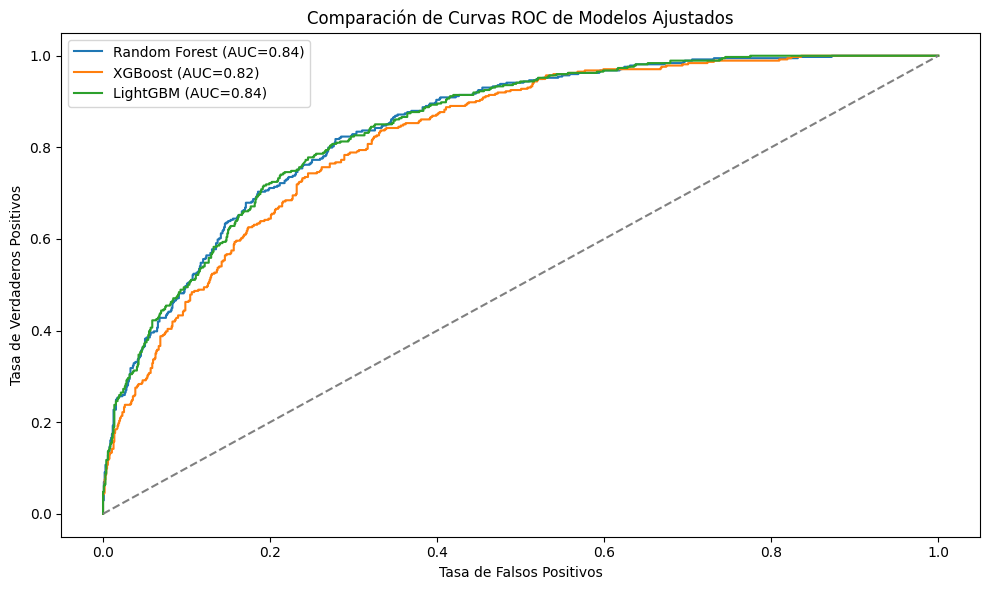

AUC Random Forest ajustado: 0.84
AUC XGBoost ajustado: 0.82
AUC LightGBM ajustado: 0.84


In [760]:
# Probabilidades de cada modelo ajustado
y_prob_rf = model_ajustado_rf.predict_proba(X_test)[:, 1]
y_prob_cb = model_ajustado_cb.predict_proba(X_test)[:, 1]
y_prob_xgb = model_ajustado_xgb.predict_proba(X_test)[:, 1]

#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC de Modelos Ajustados')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest ajustado: {auc_rf:.2f}")
print(f"AUC XGBoost ajustado: {auc_xgb:.2f}")
print(f"AUC LightGBM ajustado: {auc_cb:.2f}")

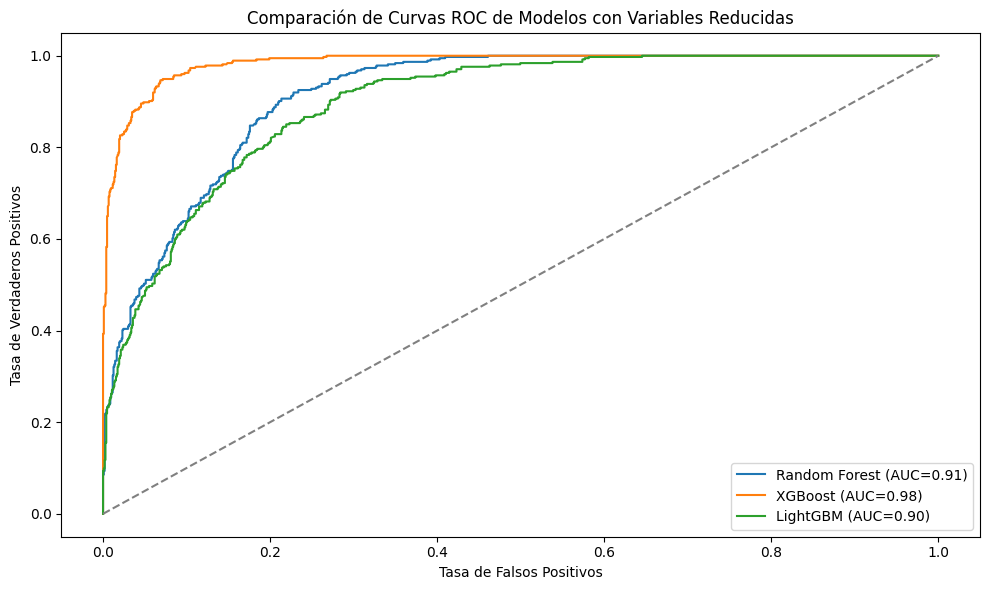

AUC Random Forest Reducido: 0.91
AUC XGBoost Reducido: 0.98
AUC LightGBM Reducido: 0.90


In [761]:
# Probabilidades de cada modelo reducido


y_prob_rf = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC de Modelos con Variables Reducidas')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest Reducido: {auc_rf:.2f}")
print(f"AUC XGBoost Reducido: {auc_xgb:.2f}")
print(f"AUC LightGBM Reducido: {auc_cb:.2f}")

In [762]:
#Ajuste de umbral para mejorar precisión y recall
y_proba = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]

umbral = 0.45
y_pred_rf_umbral = (y_proba > umbral).astype(int)

print("Random Forest con umbral ajustado (0.45):")
print(classification_report(y_test, y_pred_rf_umbral))

Random Forest con umbral ajustado (0.45):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1035
           1       0.70      0.67      0.68       374

    accuracy                           0.84      1409
   macro avg       0.79      0.78      0.79      1409
weighted avg       0.83      0.84      0.83      1409



In [763]:
# Obtener probabilidades de abandono con CatBoost
y_proba_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
umbral = 0.4
y_pred_cb_umbral = (y_proba_cb > umbral).astype(int)
print("CatBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_cb_umbral))

CatBoost con umbral ajustado (0.4):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1035
           1       0.66      0.70      0.68       374

    accuracy                           0.82      1409
   macro avg       0.77      0.79      0.78      1409
weighted avg       0.83      0.82      0.83      1409



In [764]:
#Obtener probabilidades de abandono con XGBoost
y_proba_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
umbral = 0.45
y_pred_xgb_umbral = (y_proba_xgb > umbral).astype(int)
print("XGBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_xgb_umbral))

XGBoost con umbral ajustado (0.4):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1035
           1       0.87      0.90      0.88       374

    accuracy                           0.94      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409



🔍 Análisis de Resultados
- XGBoost se destaca con la mejor precisión (0.96) y recall (0.95), lo que indica que es muy efectivo en la identificación de la clase positiva (1) y tiene un bajo número de falsos positivos.
- Random Forest tiene un buen rendimiento, especialmente en recall (0.90), lo que sugiere que es efectivo en la detección de positivos, aunque su precisión es un poco menor en comparación con XGBoost.
- CatBoost muestra un rendimiento sólido, pero no alcanza los niveles de XGBoost. Su precisión es alta, pero el recall es un poco más bajo, lo que puede indicar que está perdiendo algunos verdaderos positivos.

## 6. Interpretación
### 6.1 Analisis de las variables relevantes de XGBoost Reducido

Se revisan las variables mas relevantes para la predicción de cancelación en el modelo XGBoost reducido (el cual ha sido el modelo con mejores resultados ) y Random Forest reducido, este enfoque complementado permite identificar los factores críticos que influyen en la deserción de clientes que permitan desarrollar estrategias de retención más efectivas y personalizadas. Con esta técnica se busca equilibrar la complejidad computacional, interpretabilidad y poder predictivo.

In [765]:
importancia = model_ajustado_xgb_reducido.feature_importances_
feature_importance = sorted(
    zip(X.columns, importancia),
    key=lambda x: x[1],
    reverse=True
)
importance_xgb = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia de las características en XGBoost con variables reducidas:")
print(importance_xgb.head(10))



Importancia de las características en XGBoost con variables reducidas:
                                             Feature  Importance
0                           Tipo de Contrato_Bianual    0.483556
1                        Rango_Contrato_Riesgo Medio    0.147984
2                                           Género_M    0.105984
3                                   Múltiples Líneas    0.021661
4  Método de Pago_Transferencia bancaria (automát...    0.015579
5                              Servicios_Contratados    0.015553
6                                       TV por Cable    0.014573
7                         Protección del Dispositivo    0.013827
8                                    Soporte Técnico    0.013656
9                         Rango_Contrato_Riesgo Bajo    0.013646


In [766]:
gain_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='gain')
gain_xgb = sorted(gain_xgb.items(), key=lambda x: x[1], reverse=True)
importance_gain_xgb = pd.DataFrame(gain_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Gain:")
print(importance_gain_xgb.head(10))



Importancia de Características por Gain:
                             Feature  Importance
0           Tipo de Contrato_Mensual   55.954838
1  Servicio de Internet_Fibra Óptica   17.124043
2           Tipo de Contrato_Bianual   12.263952
3                 Seguridad en Línea    2.506486
4         Rango_Contrato_Riesgo Bajo    1.802683
5                    sqr_costo_total    1.799767
6             Streaming de Películas    1.686303
7                    Soporte Técnico    1.599955
8                       TV por Cable    1.580256
9        Rango_Contrato_Riesgo Medio    1.579041


In [767]:
#Cobertura para modelo XGBoost
cover_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='cover')
cover_xgb = sorted(cover_xgb.items(), key=lambda x: x[1], reverse=True)
importance_cover_xgb = pd.DataFrame(cover_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Cobertura:")
print(importance_cover_xgb.head(10))



Importancia de Características por Cobertura:
                                          Feature  Importance
0                        Tipo de Contrato_Mensual  304.512360
1                        Tipo de Contrato_Bianual  259.895508
2               Servicio de Internet_Fibra Óptica  224.965012
3                      Rango_Contrato_Riesgo Bajo   55.992298
4                              Seguridad en Línea   55.178318
5                               sqr_costo_mensual   45.501766
6                                 sqr_costo_total   45.443375
7  Método de Pago_Tarjeta de crédito (automático)   43.507683
8                                Múltiples Líneas   43.380199
9                     Rango_Contrato_Riesgo Medio   40.042965


In [768]:
# Variables top consistentes aparece en top 5 para Importance, Gain y Cover
top_features = set(importance_xgb['Feature'].head(5)) & set(importance_gain_xgb['Feature'].head(5)) & set(importance_cover_xgb['Feature'].head(5))
print("\nVariables Top Consistentes en Importancia, Gain y Cover:")
print(top_features)


Variables Top Consistentes en Importancia, Gain y Cover:
{'Tipo de Contrato_Bianual'}


### 6.2 Analisis complementario de variables relevantes Random Forest

In [769]:
from sklearn.inspection import permutation_importance
# Importancia nativa del modelo
importancia_nativa = rdmforest_model_reducido.feature_importances_
#imprimir 10 de las variables más importantes de la importancia_nativa
features = X_reduced.columns
importances = importancia_nativa
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia Nativa del Modelo:")
print(importance_df.head(10))

# Cálculo de reducción de impureza
importancia_impureza = rdmforest_model_reducido.feature_importances_
# permutacion_importance para evaluar la importancia de las características
#Imprimir 10 de las variables más importantes de la importancia_impureza
features = X_reduced.columns
importances = importancia_impureza
feature_importance_impureza = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df_impureza = pd.DataFrame(feature_importance_impureza, columns=['Feature', 'Importance'])
print("\nImportancia por Reducción de Impureza:")
print(importance_df_impureza.head(10))

# Evaluar la importancia de las características con permutación
rdmforest_model_reducido.fit(X_reduced, y)
result = permutation_importance(
    rdmforest_model_reducido,
    X_test.drop(columns=low_importance),
    y_test,
    n_repeats=30,
    random_state=42
)
importancia_permutacion = result.importances_mean
#Imprimir 10 de las variables más importantes de la importancia_permutacion
features = X_reduced.columns
importances = importancia_permutacion
feature_importance_permutacion = sorted(zip(features, importances), key=lambda x: x [1], reverse=True)
importance_df_permutacion = pd.DataFrame(feature_importance_permutacion, columns=['Feature', 'Importance'])
print("\nImportancia por Permutación:")
print(importance_df_permutacion.head(10))


Importancia Nativa del Modelo:
                             Feature  Importance
0                    sqr_costo_total    0.181986
1           Tipo de Contrato_Mensual    0.154945
2                  sqr_costo_mensual    0.107197
3  Servicio de Internet_Fibra Óptica    0.080956
4         Rango_Contrato_Riesgo Bajo    0.062982
5           Tipo de Contrato_Bianual    0.050754
6                 Seguridad en Línea    0.044224
7                    Soporte Técnico    0.035356
8                  Respaldo en Línea    0.032303
9              Servicios_Contratados    0.030590

Importancia por Reducción de Impureza:
                             Feature  Importance
0                    sqr_costo_total    0.181986
1           Tipo de Contrato_Mensual    0.154945
2                  sqr_costo_mensual    0.107197
3  Servicio de Internet_Fibra Óptica    0.080956
4         Rango_Contrato_Riesgo Bajo    0.062982
5           Tipo de Contrato_Bianual    0.050754
6                 Seguridad en Línea    0.0442

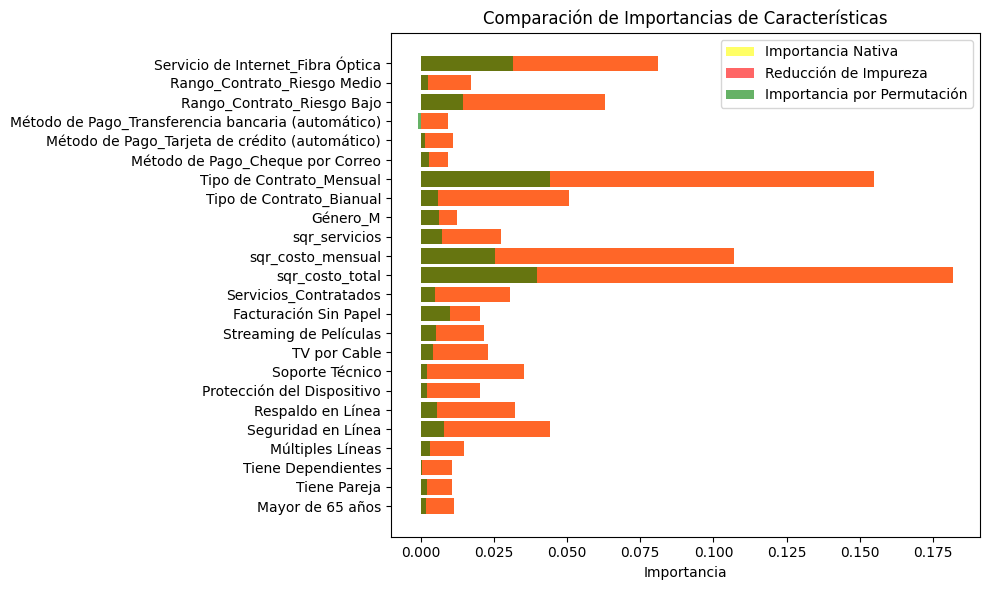

In [770]:
#Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(X_reduced.columns, importancia_nativa, label='Importancia Nativa', color='yellow', alpha=0.6)
plt.barh(X_reduced.columns, importancia_impureza, label='Reducción de Impureza', color='red', alpha=0.6)
plt.barh(X_reduced.columns, importancia_permutacion, label='Importancia por Permutación', color='green', alpha=0.6)
plt.xlabel('Importancia')
plt.title('Comparación de Importancias de Características')
plt.legend()
plt.tight_layout()

In [771]:
# Variables top consistentes para random forest
top_features_rf = set(X_reduced.columns[importancia_nativa > 0.01]) & set(X_reduced.columns[importancia_impureza > 0.01]) & set(X_reduced.columns[importancia_permutacion > 0.01])
print("\nVariables Top Consistentes en Importancias de Random Forest:")
print(top_features_rf)



Variables Top Consistentes en Importancias de Random Forest:
{'Rango_Contrato_Riesgo Bajo', 'Tipo de Contrato_Mensual', 'Servicio de Internet_Fibra Óptica', 'sqr_costo_mensual', 'sqr_costo_total'}


## 7. Anexos

In [772]:
#Generación del Modelo XGBoost con las variables reducidas entrenado
# Guardar el modelo entrenado
import joblib
joblib.dump(model_ajustado_xgb_reducido, 'modelo_xgboost_reducido.pkl')

['modelo_xgboost_reducido.pkl']